In [1]:
%load_ext autoreload
%autoreload 2


from util import *
from kmeans import algorithm



In [6]:

problem_file = '../../alg_test_problems_20240429/TEST_K50_1.json'
timelimit = 10


with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

alg_start_time = time.time()

exception = None

solution = None
# try:
    # Run algorithm!
solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
# except Exception as e:
#     exception = f'{e}'

alg_end_time = time.time()

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

checked_solution['time'] = alg_end_time - alg_start_time
checked_solution['timelimit_exception'] = (alg_end_time - alg_start_time) > timelimit + 1 # allowing additional 1 second!
checked_solution['exception'] = exception

checked_solution['prob_name'] = prob['name']
checked_solution['prob_file'] = problem_file

# checked_solution

Best obj = 2827.4480000000003
[['BIKE', [0, 3, 5, 7, 10, 11, 13, 25, 27, 28, 29, 32, 35, 36, 37, 40, 42, 43, 46, 47, 49], [0, 3, 5, 7, 10, 11, 13, 25, 27, 28, 29, 32, 35, 36, 37, 40, 42, 43, 46, 47, 49]], ['BIKE', [16, 45], [16, 45]], ['BIKE', [2, 6, 8, 14, 20, 24, 30, 33, 38, 41], [2, 6, 8, 14, 20, 24, 30, 33, 38, 41]], ['BIKE', [19], [19]], ['BIKE', [4, 31, 34, 44, 48], [4, 31, 34, 44, 48]], ['BIKE', [1, 9, 15, 17, 18, 21, 39], [1, 9, 15, 17, 18, 21, 39]], ['BIKE', [22], [22]], ['BIKE', [12, 23, 26], [12, 23, 26]]]
Order 0 is NOT assigned!


/home/jung/anaconda3/envs/ogc2024/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


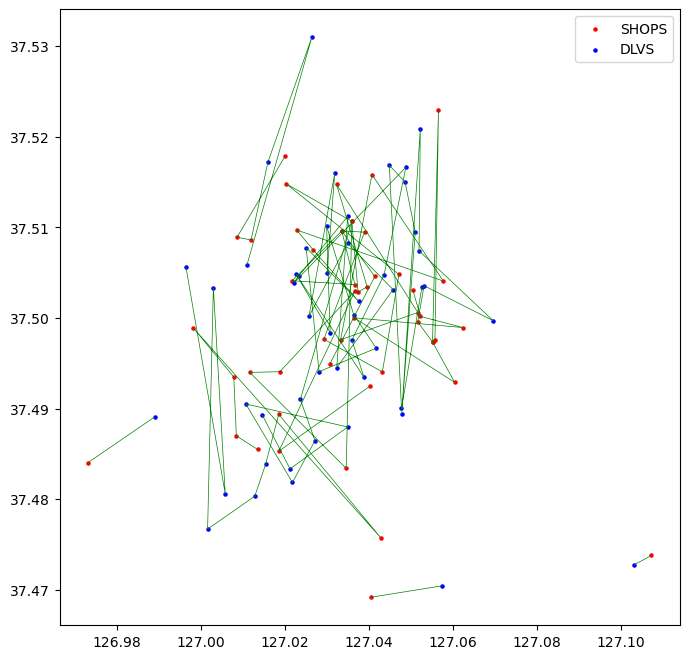

In [3]:
draw_route_solution(ALL_ORDERS, checked_solution)

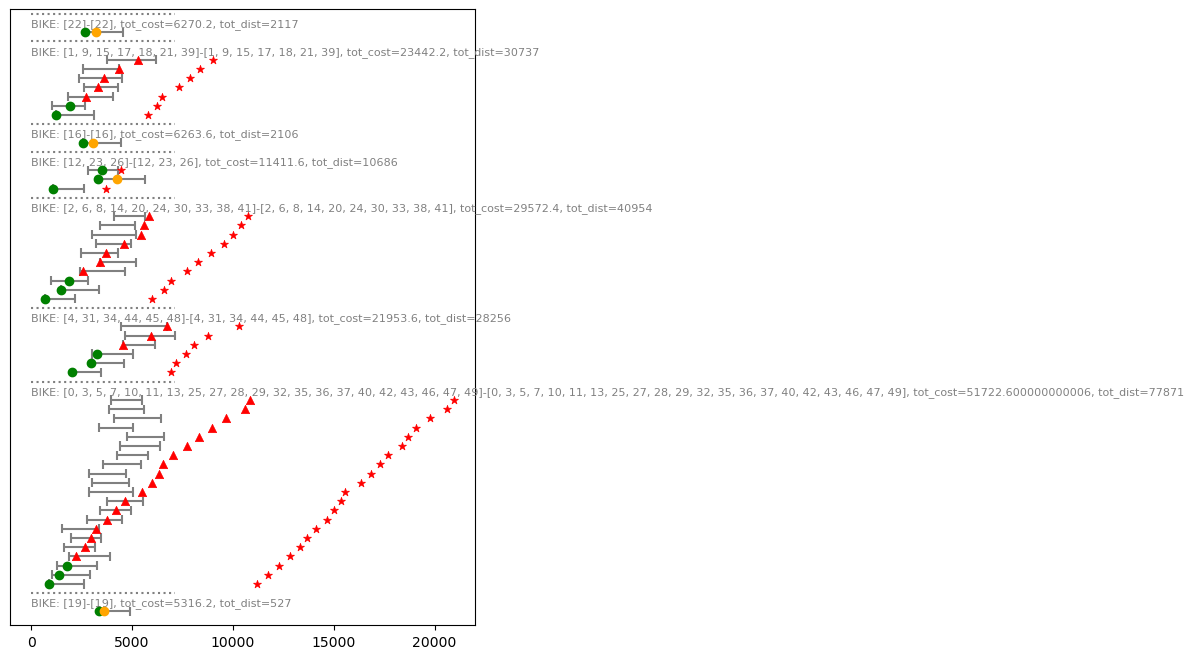

In [4]:
draw_bundle_solution(ALL_ORDERS, ALL_RIDERS, DIST, checked_solution)